### Lab4 - Dopasowanie rozkładu do danych

Przygotowanie do dopasowania rozkładu do danych zaczynamy od ponownego pobrania danych z Wikipedii. Jak poprzednio, będą to dane dotyczące największych miast w Europie.

In [23]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

URL = "https://en.wikipedia.org/wiki/List_of_European_cities_by_population_within_city_limits"
resp = requests.get(URL) 
if resp.status_code == 200:
    soup = BeautifulSoup(resp.content,'html.parser')
    tab = soup.find('table',{'class':"wikitable"})
df = pd.read_html(str(tab))[0]
df =df.loc[:, 'City':'Officialpopulation':]
df.replace(to_replace={'[[a]]':"",'[[b]]':""}, regex=True,inplace=True)
df.replace(to_replace='[[,]', value="", regex=True,inplace=True)
for i in range(len(df['Officialpopulation'])):
    df['Officialpopulation'][i] = float("{:.2f}".format(int(df['Officialpopulation'][i])/1000000))
df = df[:15]
df

,City,Country,Officialpopulation
0,Istanbul,Turkey,15.84
1,Moscow,Russia,12.63
2,London,United Kingdom,9.0
3,Saint Petersburg,Russia,5.38
4,Berlin,Germany,3.66
5,Madrid,Spain,3.31
6,Kyiv,Ukraine,2.92
7,Rome,Italy,2.84
8,Bucharest,Romania,2.16
9,Paris,France,2.14


W zadaniu na to laboratorium zajmiemy się testami normalności danych D’Agostino-Pearsona oraz Shapiro-Wilka.
W moim przypadku, wybiorę cechę dotyczącą populacji miast. Oznaczę ją jako city.

In [24]:
city = df['Officialpopulation'].values

print('Populacja miast:', city)

Populacja miast: [15.84 12.63 9.0 5.38 3.66 3.31 2.92 2.84 2.16 2.14 2.01 1.93 1.85 1.79
 1.72]


### TEST SHAPIRO

In [25]:
from scipy import stats
print('Populacja miast: '+ str(round(stats.shapiro(city)[0],4)) + ' -statystyka ' + ' p-wartość- ' + str(round(stats.shapiro(city)[1],4)))

Populacja miast: 0.6927 -statystyka  p-wartość- 0.0002


Biblioteka scipy zwraca p-wartość, którą możemy odczytać z tabeli rozkładu Shapiro-Wilka . Gdy jest ona większa od 0,05 to nie mamy podstaw do odrzucenia hipotezy zerowej. W powyższym przypadku hipotezę zerową odrzucamy. Dane dla populacji miasta nie mają rozkładu normalnego.

### TEST D'AGOSTINA-PEARSONA

In [26]:
print('Populacja miast: '+ str(round(stats.normaltest(city)[0],4)) + ' -statystyka ' + ' p-wartość- ' + str(round(stats.normaltest(city)[1],4)))

Populacja miast: 11.519 -statystyka  p-wartość- 0.0032


c:\Users\Mateusz\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Możemy wyciągnąć dla tego testu identyczne wnioski. Populacja miasta nie ma rozkładu normalnego.

### b) Wizualizacja danych i ich modelu w postaci estymatora Parzena dla 3 wybranych szerokości okna h.
Cecha populacja miasta nie ma rozkładu normalnego, dlatego posłużymy się estymatorem Parzena.

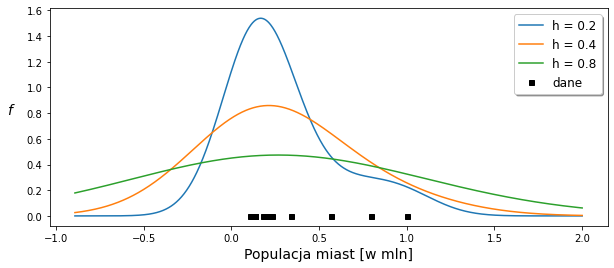

In [27]:
import numpy as np
import matplotlib.pyplot as plt
maximum_length = max(city)
city = city/maximum_length

def K(x):
  return np.exp(-x**2/2)/np.sqrt(2*np.pi)

os_x = np.linspace(city.min()-1, city.max()+1, num=1000)

H = [0.2, 0.4, 0.8]
N = city.size

plt.figure(figsize=(10,4))
for h in H:
  suma = 0
  for nr, pomiar in enumerate(city):
    suma += K((os_x-pomiar)/h)
  os_y = suma/(h*N)
  plt.plot(os_x, os_y, label=f'h = {h}')
  

plt.plot(city, np.zeros_like(city) , 's', markersize=5, color='black', label='dane')
plt.xlabel('Populacja miast [w mln]', fontsize=14)
plt.ylabel('$f$', fontsize=14, rotation='horizontal', labelpad=15)
plt.legend(fontsize=12, shadow=True)
plt.show()
